In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct

In [5]:
# Create engine to run hawaii.sqlite

engine = create_engine('sqlite:///Resources/hawaii.sqlite', echo=False)

In [6]:
# Reflect an existing database into a new model

Base = automap_base()

# Reflect the tables

Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Climate Analysis

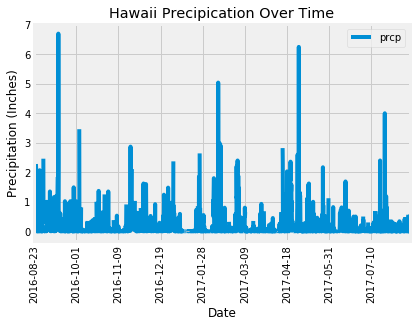

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
        
# Calculate the date 1 year ago from the last data point in the database

last_date_query = session.query(Measurement).order_by(Measurement.date.desc()).first()
last_date = last_date_query.date
# print(last_date)

one_year_ago = (datetime.datetime.strptime(last_date, '%Y-%m-%d') - timedelta(days=365)).strftime('%Y-%m-%d')
# print(one_year_ago)

# Perform a query to retrieve the date and precipitation scores

precip = session.query(Measurement.date, Measurement.prcp).\
                    order_by(Measurement.date.desc()).\
                    filter(Measurement.date<=last_date).\
                    filter(Measurement.date>=one_year_ago).statement

# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_df = pd.read_sql_query(precip, session.bind)
precipitation_df = precipitation_df.set_index('date')
precipitation_df.head()

# Sort the dataframe by date

sorted_precipitation = precipitation_df.sort_values(by="date")
sorted_precipitation.head()

# Use Pandas Plotting with Matplotlib to plot the data

hawaii_precipitation = sorted_precipitation.reset_index()
# hawaii_precipitation.head()

hawaii_precipitation.plot(x='date', y='prcp', title='Hawaii Precipication Over Time', rot='90')
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data

hawaii_precipitation.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [12]:
# Design query to show how many stations are available in this dataset

stations = session.query(Measurement.station).\
                    group_by(Measurement.station)

station_count = stations.count()

print(f'There are {station_count} stations available in this dataset')

There are 9 stations available in this dataset


In [13]:
# Design a query to find the most active stations.
# List the stations and observation counts in descending order.
# Which station has the highest number of observations?

# Build a query to count the distinct states values:
station_activity = session.query(Measurement.station, func.count(Measurement.tobs).label('Observation Counts')).\
        group_by(Measurement.station).\
        statement

station_activity_df = pd.read_sql_query(station_activity, session.bind)
sorted_station_activity = station_activity_df.sort_values(by='Observation Counts', ascending=False)
sorted_station_activity

,station,Observation Counts
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs).label('Lowest Temp')).\
                filter(Measurement.station == 'USC00519281')

for row in lowest_temp:
    print(f'The lowest temperature recorded by USC00519281 was {row[1]}.')

highest_temp = session.query(Measurement.station, func.max(Measurement.tobs).label('Highest Temp')).\
                filter(Measurement.station == 'USC00519281')

for row in highest_temp:
    print(f'The highest temperature recorded by USC00519281 was {row[1]}.')

avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs).label('Avgerage Temp')).\
                filter(Measurement.station == 'USC00519281')

for row in avg_temp:
    print(f'The average temperature recorded by USC00519281 was {round(row[1], 2)}.')

The lowest temperature recorded by USC00519281 was 54.0.
The highest temperature recorded by USC00519281 was 85.0.
The average temperature recorded by USC00519281 was 71.66.


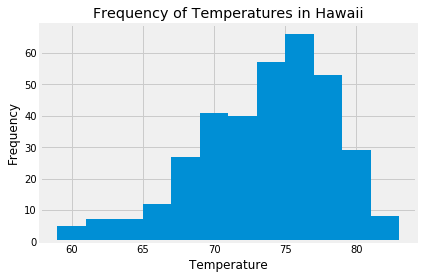

In [15]:
# Design a query to retrieve the last 12 months of temperature observation data (TOBS).
# Filter by the station with the highest number of observations.
# Plot the results as a histogram with bins=12.

# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Perform a query to retrieve the date and precipitation scores

temp_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
                    order_by(Measurement.date.desc()).\
                    filter(Measurement.date<=last_date).\
                    filter(Measurement.date>=one_year_ago)

USC00519281_temps = temp_data.filter(Measurement.station=='USC00519281').statement

# Save the query results as a Pandas DataFrame and set the index to the date column

temp_df = pd.read_sql_query(USC00519281_temps, session.bind)
temp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

temp_df.hist(bins=12)
plt.title('Frequency of Temperatures in Hawaii')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()